# Tasca M8 T01

### Ex1
##### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.
###### https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv(r"Publicacions Facebook Thailandia.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [67]:
df.shape

(7050, 16)

In [68]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

#### Preparar el dataset
Last 4 colums are empty, so drop it!


In [69]:
df = df.drop(columns=df.columns[-4:], axis=1)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [61]:
# explore this column
unique_data = df['status_type'].unique()
print (unique_data)

['video' 'photo' 'link' 'status']


In [51]:
print (len(unique_data))

4


The three first coluymns are Objects: First one is an ID, second one is a categorical type, third is a timestamp.. let's drop the first and the third, keep it the categorical one and the numerical variables that really matters.

In [71]:
df = df.drop(["status_id", "status_published"], axis=1)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [72]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Seaborn let us to see the differents correlations

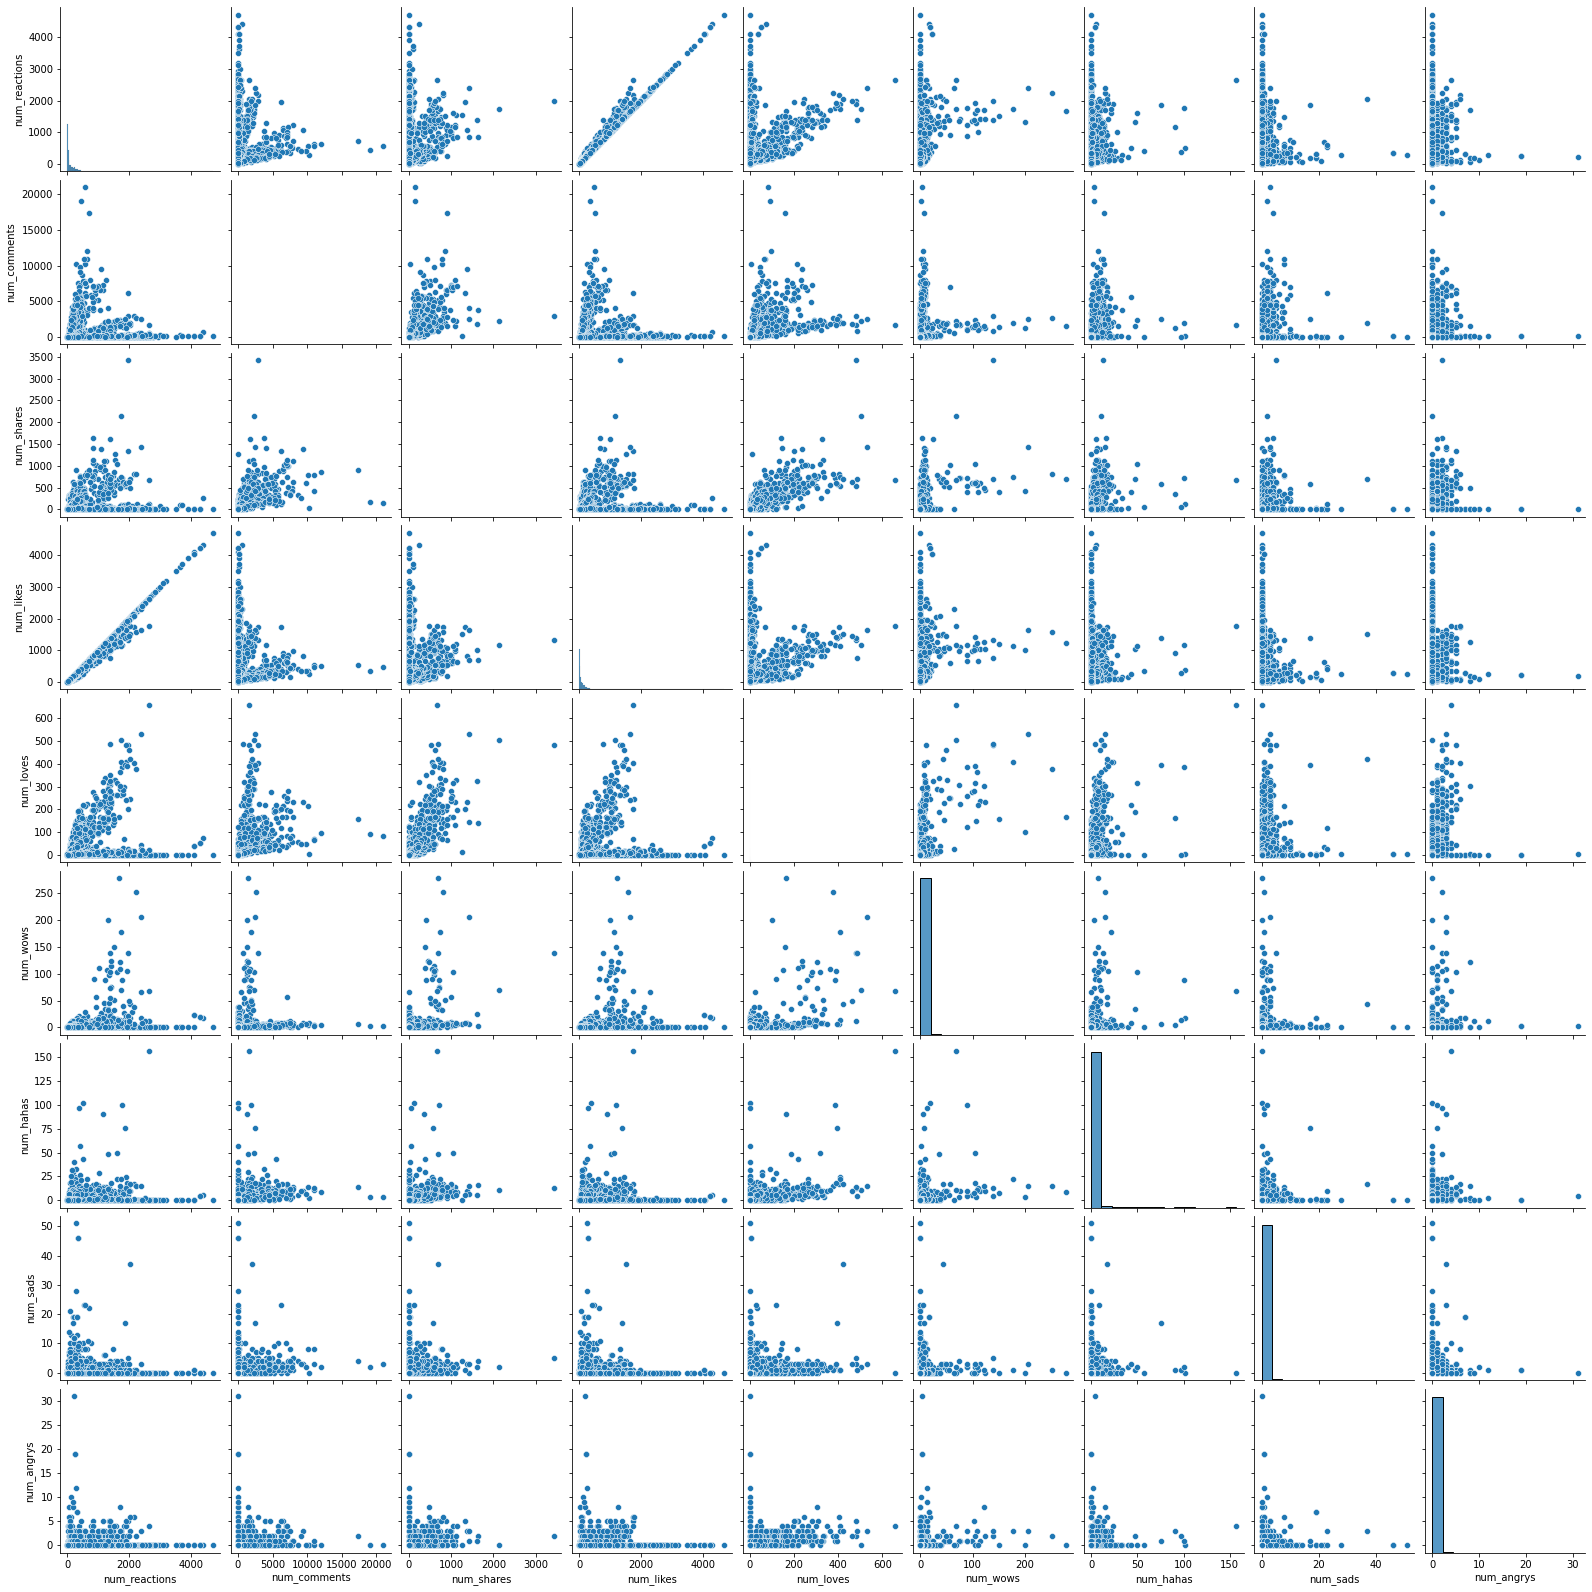

In [9]:
import seaborn as sns
sns.pairplot(df)

K-Means requires a numeric data, so lets transform "Status_type" column to numeric values.

In [74]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
labelencoder = LabelEncoder()
df['status_type'] = labelencoder.fit_transform(df['status_type'])
y = labelencoder.transform(df['status_type'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [76]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


#### Scaling data

In [77]:
cols = df.columns

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(df)
df_scaled = pd.DataFrame(x, columns=[cols])
df_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


#### Let's try diferent models with K-Means

In [116]:
from sklearn.cluster import KMeans

# K = 2
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

237.75726404419564


In [118]:
# We try with different K...now with 3
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

161.59633400033618


Inertia decrease, so the algorithn performs better.
Another try, with K = 4

In [120]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

127.31313212987803


With K =4, inertia decrease and Accuracy rise. So seems with more cluster perform better!!

Let's try to increase K more

In [127]:
kmeans = KMeans(n_clusters=5, random_state=0) 
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

96.24989550305192


Ups! Now inertia still decreasing: that's good, but accuracy decrease a lot!!!  Bad model then.

### Seems K = 4 is the best model!!

We can use Elbow algorithm to find the optimum number of clusters.

Let's see

C:\Users\Toni Andreu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


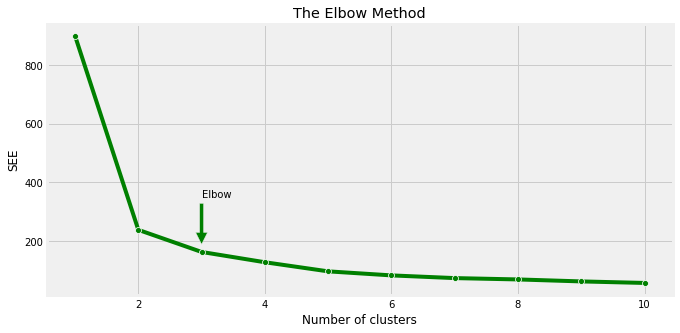

In [147]:
kmeans_kwargs = {
    "init": 'k-means++',
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

see = []

# for loop 
for i in range(1, 11):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    
    # inertia method returns see for that model
    see.append(kmeans.inertia_)
    
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), see,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SEE')
plt.annotate('Elbow', xy=(3, 180), xytext=(3, 350), arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()

Elbow mehtod shows 2 like the optimal, because it takes inertia_ values.

### Now, let's try with silhouette

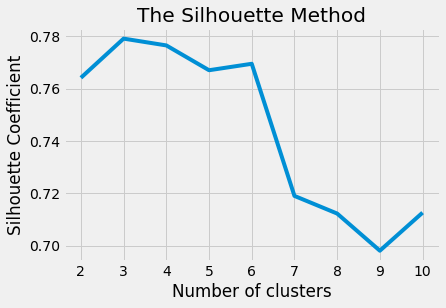

In [132]:
from sklearn.metrics import silhouette_score
sil_coefficients = []
for k in range(2, 11):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
  
    sil_coefficients.append(score)

# figure size
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil_coefficients)

# labeling
plt.title('The Silhouette Method')
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


Silhouette says 3!! 

### Ex2
##### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

#### We are going to use the Dendrogram, to decide the optimal number of clusters

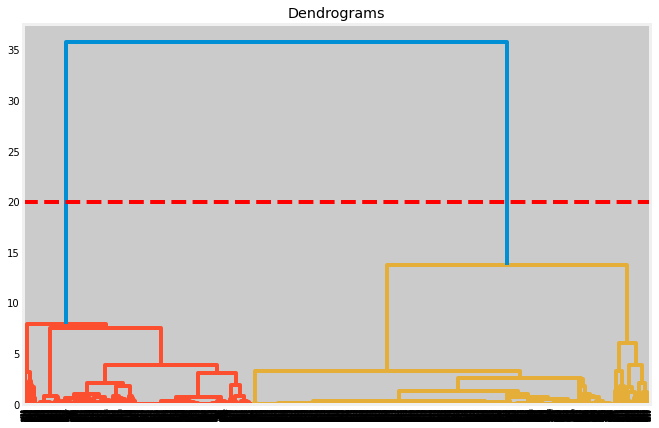

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

We have 2 clusters as this line cuts the dendrogram at 2 points. Let’s now apply hierarchical clustering for 2 clusters:

In [140]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

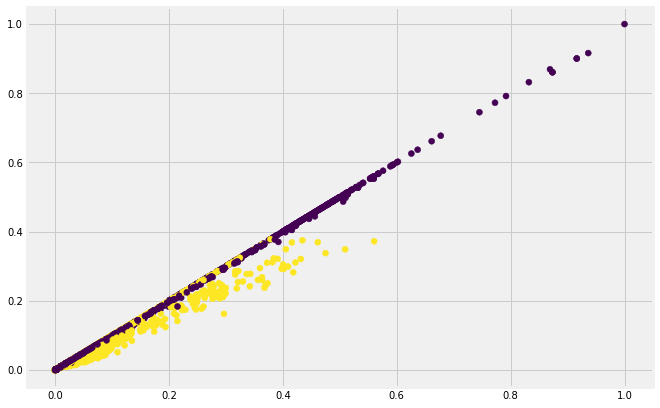

In [141]:
# let's visualize this representation on 2 variables:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['num_reactions'], df_scaled['num_likes'], c=cluster.labels_) 

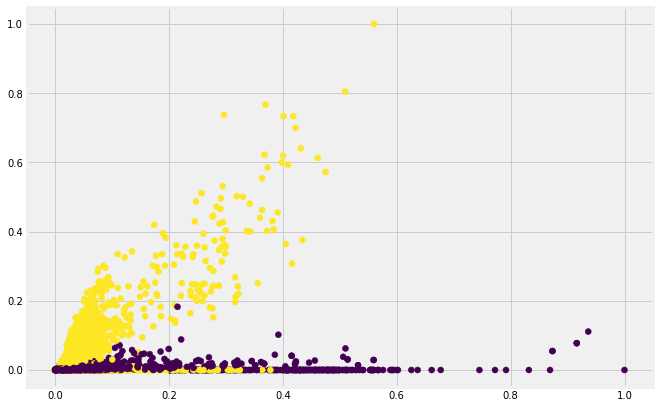

In [142]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['num_reactions'], df_scaled['num_loves'], c=cluster.labels_) 

Seems there is a linear distribution in the relation between reactions vs likes, and seems more concentration between loves in the reactions.

### Ex3  
##### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

See exercici 1.